# Isolating lipid rafts and determining their composition by using biochemical isolation in mice before, during and after the myelination process (5, 15 and 30 days old, respectively) and by using specific antibodies (flotillin, transferrin, MBP, MAG) to confirm successful raft isolation. 

In [91]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from statannot import add_stat_annotation
from scipy.stats import kruskal

#### Importing data from excel with multiple sheets

In [92]:
numbers = np.arange(0, 15) #number of excel sheets
xls = pd.ExcelFile('/home/dionizije/Desktop/Statistika/mateo.xlsx')

In [93]:
data = []
for i in numbers:
    df = pd.read_excel(xls, sheet_name = i)
    data.append(df)

Cell code above reads excel sheets as pandas dataframes and appends them to a list

#### Data for protein and mice ages

In [94]:
def get_df_from_antibodies(age_string, position_in_data_list):
    df = data[position_in_data_list].drop(columns = ['lane', 'percent'])
    df['Age'] = age_string
    df['area'] = pd.to_numeric(df['area'],errors = 'coerce')
    #there are some strings in inputs of area, they're converted to NaN for statistical tests
    return df


In [95]:
flotilin_one_month = get_df_from_antibodies('One month', 0)

In [96]:
flotilin_one_month

,area,Age
0,NaN,One month
1,NaN,One month
2,NaN,One month
3,12057.39697,One month
4,12815.27565,One month
5,7166.29646,One month
6,7186.68986,One month
7,8124.61880,One month
8,8404.10408,One month
9,13621.22540,One month


#### Rest of the data for flotilin

In [97]:
flotilin_two_weeks = get_df_from_antibodies('Two weeks', 2)
flotilin_five_days = get_df_from_antibodies('Five days', 4)

#### Creating categories in a melted dataframe for seaborn box plot

In [98]:
df_flotilin_category_1 = pd.concat([flotilin_five_days, flotilin_two_weeks])
df_flotilin_category_1['Category'] = '5D - 2W' #adding category labels so they can be separated by hue

df_flotilin_category_2 = pd.concat([flotilin_five_days, flotilin_one_month])
df_flotilin_category_2['Category'] = '5D - 1M'

df_flotilin_category_3 = pd.concat([flotilin_two_weeks, flotilin_one_month])
df_flotilin_category_3['Category'] = '2W - 1M'

#creating a melted dataframe
df_total_flotilin = pd.concat([df_flotilin_category_1, df_flotilin_category_2, df_flotilin_category_3])

In [99]:
df_total_flotilin.head(10)

,area,Age,Category
0,NaN,Five days,5D - 2W
1,NaN,Five days,5D - 2W
2,NaN,Five days,5D - 2W
3,4427.17514,Five days,5D - 2W
4,2255.95332,Five days,5D - 2W
5,NaN,Five days,5D - 2W
6,NaN,Five days,5D - 2W
7,NaN,Five days,5D - 2W
8,2943.36753,Five days,5D - 2W
9,3932.83200,Five days,5D - 2W


## Mann-Whitney-Wilcoxon significance of flotilin expression between age groups

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

5D - 2W_Five days v.s. 5D - 2W_Two weeks: Mann-Whitney-Wilcoxon test two-sided P_val=8.710e-01 U_stat=1.600e+01
5D - 1M_Five days v.s. 5D - 1M_One month: Mann-Whitney-Wilcoxon test two-sided P_val=2.341e-02 U_stat=5.000e+00
2W - 1M_Two weeks v.s. 2W - 1M_One month: Mann-Whitney-Wilcoxon test two-sided P_val=8.323e-01 U_stat=2.900e+01


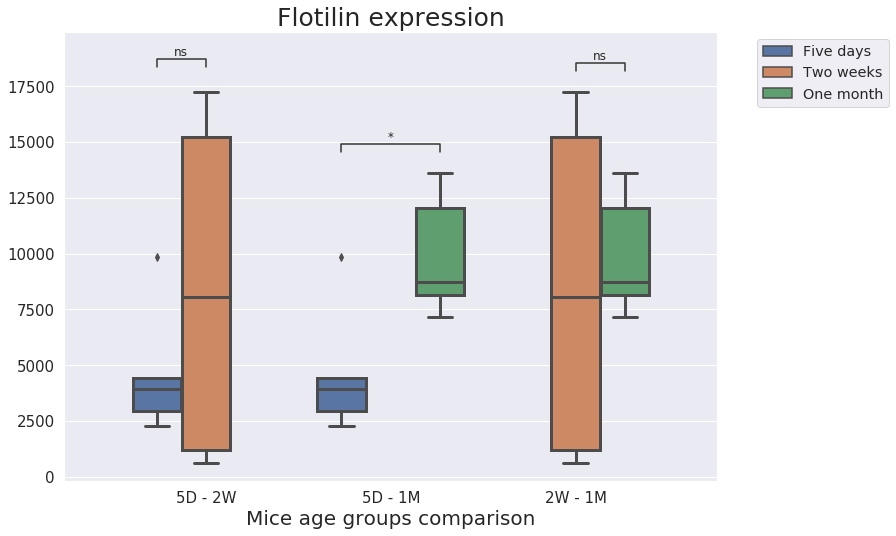

In [100]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
graph_flotilin = sns.boxplot(x = 'Category', y = 'area', hue = 'Age', data = df_total_flotilin,
                            linewidth = 3, dodge = True)
add_stat_annotation(graph_flotilin, data = df_total_flotilin, x = 'Category', y = 'area', hue = 'Age',
                   box_pairs = [(('5D - 2W', 'Five days'), ('5D - 2W', 'Two weeks')),
                               (('5D - 1M', 'Five days'), ('5D - 1M', 'One month')),
                               (('2W - 1M', 'Two weeks'), ('2W - 1M', 'One month'))],
                   test = 'Mann-Whitney', text_format = 'star', loc = 'inside', verbose = 1, stack = False)

plt.xlabel('Mice age groups comparison', fontsize = 20)
plt.ylabel('')
plt.title('Flotilin expression', fontsize = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, fontsize = 'large')


## Kruskal-Wallis significance of flotilin expression between age groups

In [101]:
kruskal_results = kruskal(flotilin_two_weeks['area'], flotilin_five_days['area'], flotilin_one_month['area'],
                          nan_policy = 'omit')
print(kruskal_results)


KruskalResult(statistic=3.033436404864972, pvalue=0.21943083416514148)
